# Project: Investigation of No-show Medical appointments in Brazil
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset selected for analysis collects information from 100K medical appointments in Brazil. It is mainly focused on the question of whether or not patients show up for their appointment.
The dataset includes different characteristics like the neighborhood, whether or not the patients are enrolled in the Brazilian social welfare program (Bolsa Família, which provided financial aid to poor Brazilian families), Age etc. 
We will be alalyzing whether these characteristics have an influence on whether or not a patient will be a no-show at the Medical appointment.

In this analysis, we will be trying to give answers to the following research questions.
1. Which gender is more likely to miss their scheduled appointments?
2. What does the age distribution of patients look like? Does it have an influence on patients keeping or missing Appointments?
3. What percentage of patients show up to the Appointments?
4. Does sending SMS messages have an influence on whether patients miss or show up for their appointments?
5. What does the distribution of patients in the neighbourhoods look like? Is the percentage of no-shows in the neighbourhoods evenly distributed?
6. Does being enrolled in scholarships have influence on whether patients miss or show up for their appointments?

## Importing Necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

In this section of the report, we will load in the data, check for cleanliness, and then trim (if necessary) and clean our dataset for analysis. 
### General Properties

In [3]:
# Lets load the dataset and look at the format
df_ns = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_ns.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Lets find the number of columns and rows in the dataset
df_ns.shape

(110527, 14)

### Initial Observation
We can observe that the data contains 110,527 rows (patient data), and 14 columns (different characteristics). Next Let's see what other information we can gather with simple lines of code. 

In [5]:
# Lets see what datatypes our dataframe includes
df_ns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null values in the data which is a good start. Most of the datatypes of our dataframe are in the correct format. Although we'll need to change the datatypes of 'scheduledDay', 'AppointmentDay' and PatientId in the data cleaning process, we won't do so in this research because it is beyond the scope of this analysis.

In [6]:
df_ns.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

The number of unique values of the patientID column tells us that some patients have made appointments more than once. 

In [7]:
# Now lets look at whether our data contains duplicates.
df_ns.duplicated().sum()

0

There are no duplicated data in the dataset which is good.

In [8]:
df_ns.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### The pandas describe method gives us some insight into our data before the cleaning process.
1. A mean Value for age of the patients is 37. 
2. The min value for age of -1 should be an error in the data. In order to check that we could look at how many patient data we have with age <0
3. Around 9.8% of patients are enrolled in the Brazilian welfare program.
4. Around 19.7% of patients have Hypertension.
5. Around 7% of the patients have Diabetes.
6. 3% of the patients are Alcoholic.
7. 32% of the patients received SMS.

In [9]:
len(df_ns[df_ns['Age'] < 0]) 
# or we can use df_ns.query('Age < 0').count()

1

There is a only one row with "Age" < 0 which can signify an erroneous data. So we'll remove this row in our data cleaning process.

In [10]:
# next lets check how much data we have with age = 0
len(df_ns[df_ns['Age'] == 0]) 

3539

There are 3539 data with 'Age' values of 0 which could suggest newborn patients who haven't reached Age 1. So we'll leave the data as it is. 

In [11]:
df_ns.Age.nunique()

104

Since we have 104 unique values of Age, Its better to create categories for simpler analysis.

In [12]:
df_ns.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

The data shows 65% of patients are Female patients.

### Data Cleaning (Dropping unwanted columns, erroneous rows and Renaming misspelled columns)

In [13]:
 #drop the columns 'PatientID' and 'AppointmentID' from the dataset because we won't need them.
df_ns.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

# confirm changes
df_ns.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Now lets remove the row containing Age < 0

In [14]:
#lets drop the row with an erroneous data
df_ns.drop(df_ns[df_ns.Age <0].index, inplace =True)

In [15]:
# we should see 1 row has been removed from the dataset
df_ns.shape

(110526, 12)

Lets rename the misspelled columns and use underscores in order to avoid confusion.

In [16]:
df_ns.columns = ['gender', 'scheduled_day',
    'appointment_day', 'age', 'neighbourhood', 'scholarship',
    'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
    'no_show'
    ]

In [17]:
df_ns.head(1)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Lets create a new column 'age_group' for ease of analysis. We will classify the age groups from 0-9

In [18]:
df_ns['age_group'] = (df_ns.age.apply(lambda x: min(int(x / 10) , 9)))
df_ns.age_group.value_counts().sort_index()

0    17475
1    12936
2    13699
3    15171
4    14209
5    15863
6    11876
7     5934
8     2946
9      417
Name: age_group, dtype: int64

In [19]:
df_ns.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_group
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,6
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,5
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,6
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,5


Lets Create a new column "Absent" by converting the string values of the no_show column into number values for easy analysis. A value of 1 for Absent column show the patients were a no show for their appointments while a value of 0 entails they did show up for their appointments

In [20]:
df_ns['absent'] = (df_ns.no_show == 'Yes').astype(int)

Lets check whether the code above gave the intended result by checking.

In [21]:
len(df_ns[df_ns['absent'] == 0]) == len(df_ns[df_ns['no_show'] == 'No']) 

True

<a id='eda'></a>
## Exploratory Data Analysis

Now that cleaned up our data, We are ready to move on to exploration. We will compute statistics and create visualizations with the goal of addressing the research questions that have been posed in the Introduction section. 



### Gender Classification of the patients

In the previous sections we've already found out that there are 71,839 (65%) Female and 38,687 (35%) Male patients. This can be visualized by using a pie chart below.

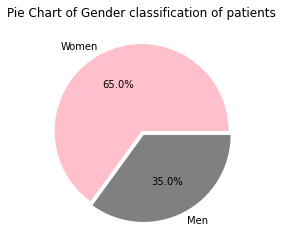

In [22]:
color = 'pink', 'grey'
label = 'Women','Men'
df_gender = df_ns.gender.value_counts()
plt.pie(df_gender, labels = label, colors= color, autopct='%.1f%%', explode=(0, .05))
plt.title ('Pie Chart of Gender classification of patients')
plt.show()

In the above pie chart, we have visualized the distribution of Male and females in our data frame. Next lets look at what the distribution of no shows looks like in each gender. Below we have plotted a histogram to visualize this.

In [55]:
# Lets define a function that'll remove repetitive code while plotting graphs. This code was recommended by the review team.
def label(x,y,t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

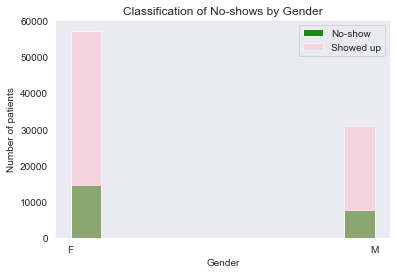

In [56]:
no_show_y = df_ns.gender[df_ns.no_show == 'Yes']
no_show_n = df_ns.gender[df_ns.no_show == 'No']
plt.hist(no_show_y,  color = 'green', alpha =.9)
plt.hist(no_show_n, color = 'Pink', alpha = .5)
sns.set_style('dark')
plt.legend(['No-show', 'Showed up'])
label('Gender','Number of patients','Classification of No-shows by Gender')

In [57]:
no_show_y.value_counts()

F    14594
M     7725
Name: gender, dtype: int64

In [58]:
no_show_n.value_counts()

F    57245
M    30962
Name: gender, dtype: int64

The data shows an even distibution of no shows of 20% for men women to their appointments. 



### Research Question 2: What does the age distribution of patients look like? What kind of relationship does it have patients keeping or missing Appointments?

Lets first plot a box plot and a histogram of the age of the patients.

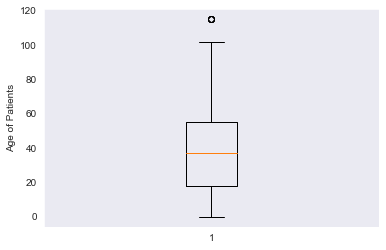

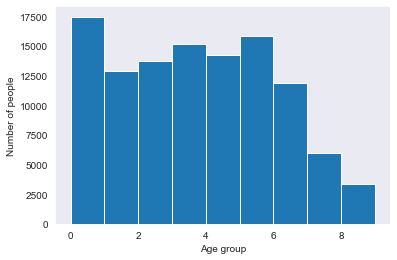

In [59]:
#Lets see the age distribution based on the new age group column
plt.boxplot(df_ns["age"])
label('',"Age of Patients",'')
plt.hist(df_ns["age_group"], bins = 9)
label("Age group","Number of people",'')

In [60]:
Mean_age = df_ns.age.mean()
Mean_age

37.089218826339504

The above graphs show the age of the patients to be skewed to signify a younger and middle aged generation. This can be backed up by calculating the mean of the patients above.

### What is the distribution of no-shows with respect to age?

Lets first calculate the mean ages for patients who were present for their appointments and who were a no -show to their appointments.

In [61]:
# calculate the mean age for people who showed up to their appointments
Mean_present = df_ns[(df_ns.absent == 0)].age.mean()
Mean_present

37.790504154999034

In [62]:
# calculate the mean age for people who were a no-show to their appointments
Mean_Absent = df_ns[(df_ns.absent == 1)].age.mean()
Mean_Absent

34.31766656212196

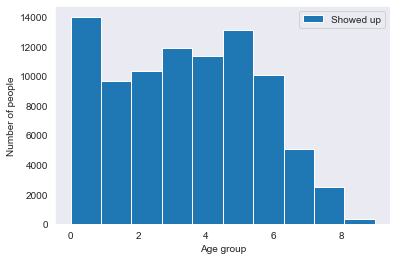

In [63]:
# lets plot a histogram of the patients who showed up to their appointments classified by their age group
p = df_ns.loc[(df_ns['no_show'] == 'No')]
p.age_group.plot.hist();
plt.legend(['Showed up'])
label("Age group","Number of people",'')

Now Lets visualize the patients who showed up and were a no-show, classified by their age group in one histogram

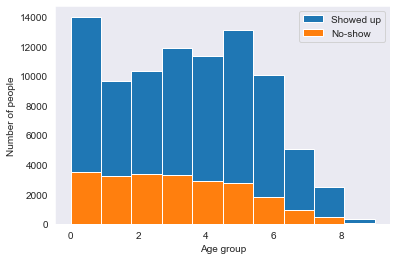

In [64]:
present = (df_ns['absent'] == 0)
noshows = (df_ns.absent == 1)

df_ns[present].age_group.plot.hist()
df_ns[noshows].age_group.plot.hist()
plt.legend(['Showed up', 'No-show'])
label("Age group","Number of people",'')

In [65]:
len(df_ns[df_ns['absent'] == 1]) 

22319

The mean value of the Age of as well as the above graph tell us younger patients have more tendency to Miss appointments.

### Research Question  3  What percentage of patients show up to the Appointments?

The pie chart constructed below shows a significant number of no-shows is recorded with a over 79% of patients missing their appointments.

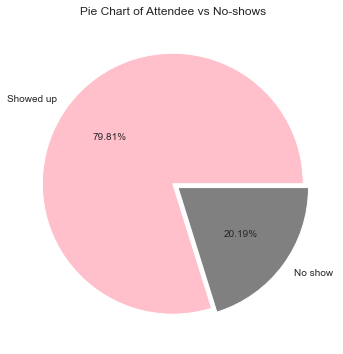

In [75]:
color = 'pink', 'grey'
lab = 'Showed up','No show'
df_ab = df_ns['absent'].value_counts()
df_ab.plot.pie(figsize=(6,6), labels = lab, colors= color, autopct='%.2f%%', explode=(0, .05))
label(None,None,'Pie Chart of Attendee vs No-shows')

### Research Question 4: Does receiving sms have an effect on patients being a no-show for their appointments?

We can see from the analysis below that 32% of the patients received sms messages. What we are trying to find is whether receiving messages affects patients being a no show to their appointments.

In [76]:
df_ns.sms_received.mean()

0.3210285362720084

For easier analysis, we have separated the patients who have recieved sms and were a no-show, and the ones who showed up.

In [77]:
df_1 = df_ns.loc[(df_ns['sms_received'] == 1) & (df_ns['absent'] == 0)]
df_2 = df_ns.loc[(df_ns['sms_received'] == 1) & (df_ns['absent'] == 1)]

In [78]:
# lets see how many people received texts and were absent as well as how many people didn't receive texts and were absent.
print(df_1.absent.value_counts())
df_2.absent.value_counts()

0    25698
Name: absent, dtype: int64


1    9784
Name: absent, dtype: int64

We can gather from the above analysis 9,784 patients who received sms, were a no-show. Meanwhile 25,698 patents who received sms showed up. Next lets see what percent of people who received sms and who didn't receive sms were a no show to their appointments.

In [79]:
df_yestxt = df_ns[df_ns['sms_received'] == 1]
df_notxt = df_ns[df_ns['sms_received'] == 0]

In [80]:
df_yestxt['absent'].mean(), df_notxt['absent'].mean()

(0.27574544839637, 0.16703533926762965)

The mean values for no shows for people who receive texts and the people who do not receive texts shows a larger percentage of no shows are observed for people who receive texts. This can be visualized by a bar chart below.

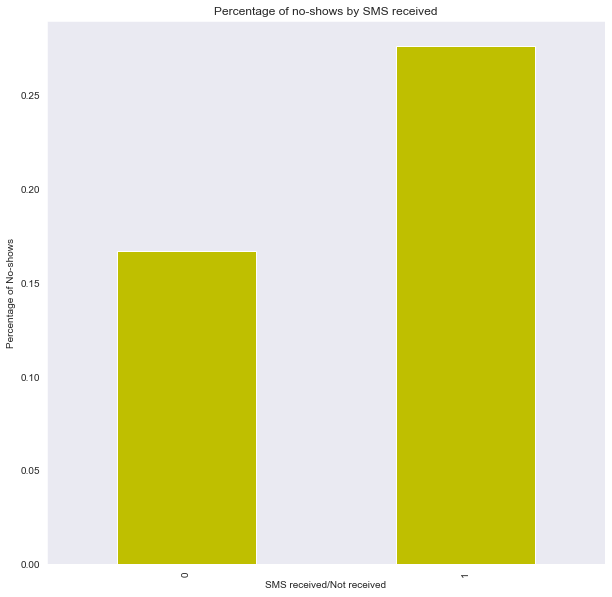

In [81]:
df_sms = df_ns.groupby('sms_received')['absent'].mean()
df_sms.plot(kind = 'bar', color = 'y', figsize = (10,10));
label("SMS received/Not received","Percentage of No-shows",'Percentage of no-shows by SMS received')

The distribution of no shows classified by the age group can be visualized below first for the people who received the texts and second for the people who didn't receive the texts.

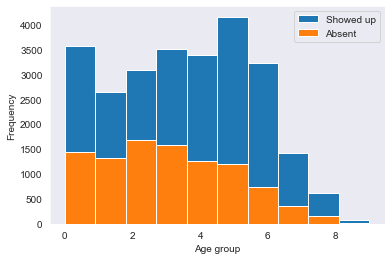

In [82]:
present = (df_yestxt.absent == 0)
noshows = (df_yestxt.absent == 1)

df_yestxt[present].age_group.plot.hist()
df_yestxt[noshows].age_group.plot.hist()
plt.legend(['Showed up', 'Absent'])
label("Age group","Frequency",None)

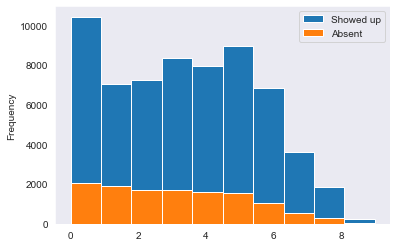

In [83]:
present = (df_notxt.absent == 0)
noshows = (df_notxt.absent == 1)

df_notxt[present].age_group.plot.hist()
df_notxt[noshows].age_group.plot.hist()
plt.legend(['Showed up', 'Absent'])
plt.show()

27% of the people who received SMS and 17% of the people who didn't recieve SMS were a no show to their appointments. This can also be seen in the bar charts above. 

### Research Question 5. What does the distribution of patients in the neighbourhoods look like? Is the percentage of no-shows in the neighbourhoods evenly distributed?

Lets first plot a simple horizontal bar graph representing the neighborhoods with the largest number of patients in the dataset.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


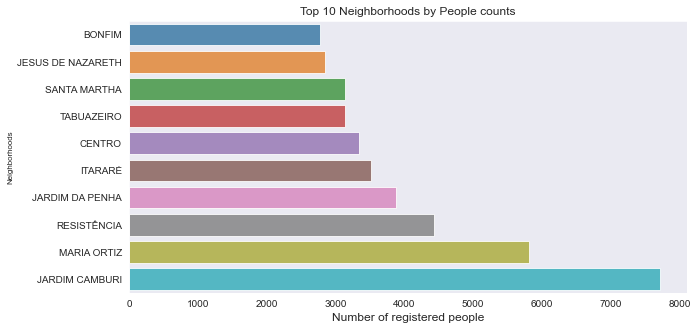

In [84]:
nei_count  = df_ns['neighbourhood'].value_counts().sort_values(ascending =True)
nei_count = nei_count[71:,]
plt.figure(figsize=(10,5))
sns.barplot(nei_count.values,nei_count.index, alpha=0.8)
plt.title('Top 10 Neighborhoods by People counts')
plt.ylabel('Neighborhoods', fontsize=8)
plt.xlabel('Number of registered people', fontsize=12)
plt.show()

Now lets plot a bar graph showing the distribution of no-shows in these neighbourhoods

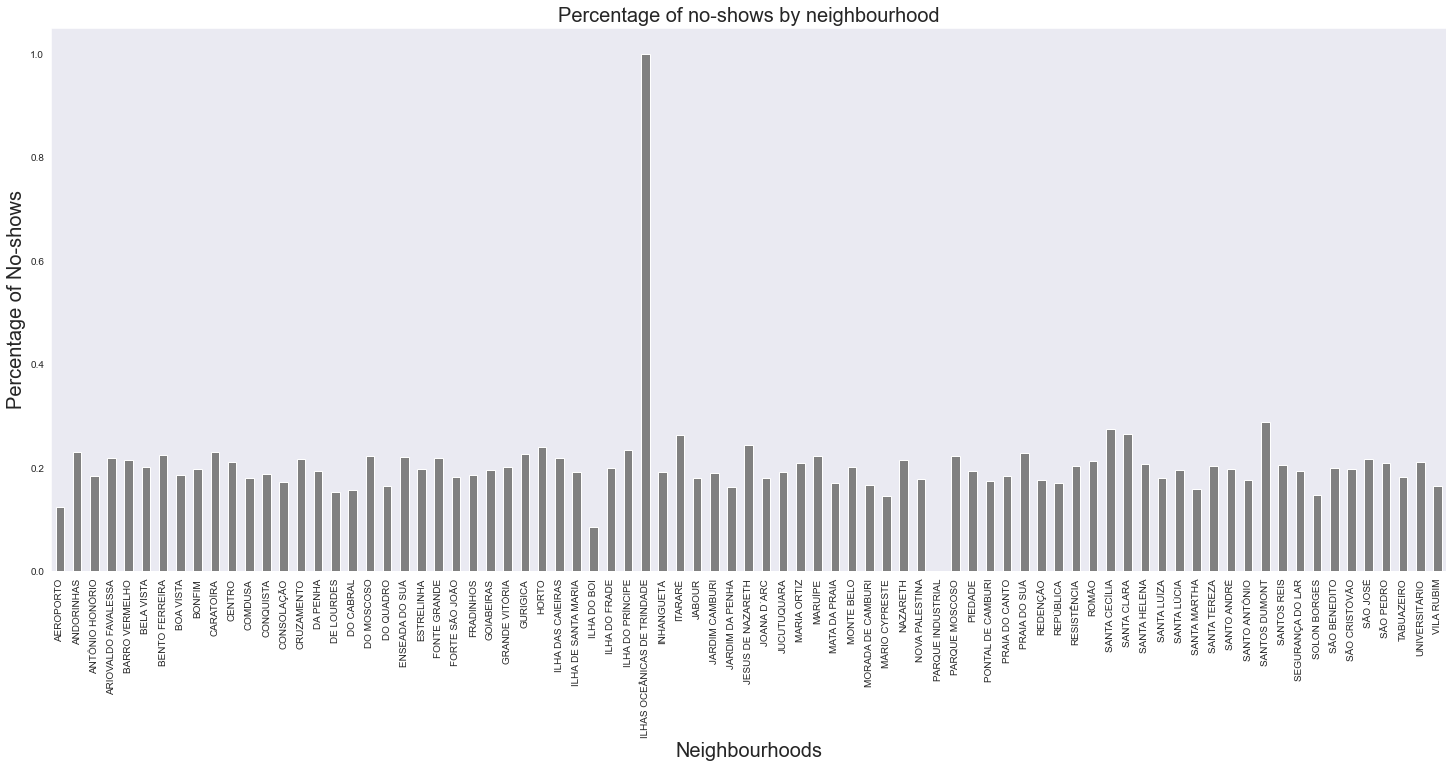

In [85]:
df_neigh = df_ns.groupby('neighbourhood')['absent'].mean()
df_neigh.plot(kind = 'bar', color = 'grey', figsize = (25,10))
plt.title('Percentage of no-shows by neighbourhood',fontsize=20)
plt.ylabel("Percentage of No-shows", fontsize=20)
plt.xlabel("Neighbourhoods", fontsize=20)
plt.show()

The bar graph above shows an even distribution of no-shows for most of the neighbourhoods.

### Research Question 6 Does being enrolled in scholarships have influence on whether patients miss or show up for their appointments?

Lets plot a bar graph showing the relationship between being enrolled in the welfare program and being a no-show to the appointments.

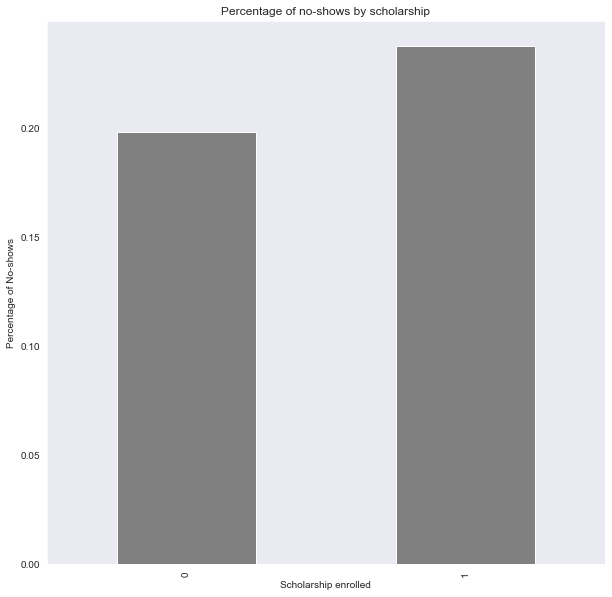

In [86]:
df_ns.groupby('scholarship')['absent'].mean().plot(kind = 'bar', color = 'grey', figsize = (10,10));
label("Scholarship enrolled","Percentage of No-shows",'Percentage of no-shows by scholarship')

From the bar chart above we can observe the people who were enrolled in the welfare program missed their appointments more.

Next lets look at how being enrolled in the welfare program and receiving sms affects whether the patients were a no show to their appointment or not by visualizing it in a bar chart. 

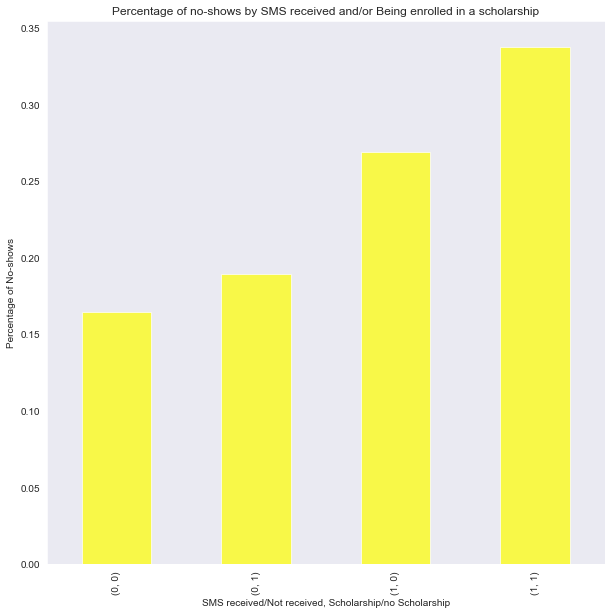

In [87]:
df_ns.groupby(['sms_received','scholarship'])['absent'].mean().plot(kind = 'bar', color = 'yellow', figsize = (10,10),alpha =0.7);
label("SMS received/Not received, Scholarship/no Scholarship","Percentage of No-shows",'Percentage of no-shows by SMS received and/or Being enrolled in a scholarship')

The bar chart revealed that the people who didn't receive scholarships and didn't receive sms messages showed up to their appointments more than those who were enrolled in the scholarship program and received sms messages.

<a id='conclusions'></a>
## Conclusions

1. Although the number of female patients is nearly double the number of male patients, an even distibution of no-shows of 20%has been observed for both genders.

2.  The mean age of the patients who are a no-show to their appointments is 34.3 which is less than the average age of the patients (37). This shows younger patients tend to miss their appointments more than older patients.

3. Around 20 percent of patients miss their appointments (are a no-show).

4. The patients who received sms messages tend to miss appointments (27% no show rate) more than those who didn't receive text messages (17% no show rate).


5. There is an even distribution (around 20%) of no shows for most of the neighbourhoods.

6. The people who didn't receive scholarships and didn't receive sms messages showed up to their appointments more than those who were enrolled in the scholarship program and received sms messages.


### Limitations

Since this was my first Data analysis project, I've limited the scope of the analysis and didn't seek to answer every possible questions we might raise from the dataset.
Here are some of the limitations of this research.

1. Not every independent variable were utilized to analyze the changes in the dependent variable.
2. The correlation between each independent variable wasn't analyzed extensively.
3. More coding practices will lead to better and shorter analysis.